# Parte 1

Nota: Después de mucho investigar y estudiar el algoritmo de backpropagation e intentar implementarlo me fue imposible llegar a una solución satisfactoria, obteniendo matrices con valores NaN. Por lo cual me base en el código que se muestra en este enlace, modificandolo de manera tal que se adapte a lo pedido en el problema.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)

In [136]:
training_data = X_train
training_labels = y_onehot

hidden_nodes = 32
num_labels = training_labels.shape[1]
num_features = training_data.shape[1]
learning_rate = .01
reg_lambda = .01

# Weights and Bias Arrays, just like in Tensorflow
layer1_weights_array = np.random.normal(0, 1, [num_features, hidden_nodes]) 
layer2_weights_array = np.random.normal(0, 1, [hidden_nodes, 16])
layer3_weights_array = np.random.normal(0, 1, [16, num_labels])

layer1_biases_array = np.zeros((1, hidden_nodes))
layer2_biases_array = np.zeros((1, 16))
layer3_biases_array = np.zeros((1, num_labels))

def relu_activation(data_array):
    return np.maximum(data_array, 0)
def softmax(output_array):
    logits_exp = np.exp(output_array)
    return logits_exp / np.sum(logits_exp, axis = 1, keepdims = True)
def cross_entropy_softmax_loss_array(softmax_probs_array, y_onehot):
    indices = np.argmax(y_onehot, axis = 1).astype(int)
    predicted_probability = softmax_probs_array[np.arange(len(softmax_probs_array)), indices]
    log_preds = np.log(predicted_probability)
    loss = -1.0 * np.sum(log_preds) / len(log_preds)
    return loss
def regularization_L2_softmax_loss(reg_lambda, weight1, weight2, weight3):
    weight1_loss = 0.5 * reg_lambda * np.sum(weight1 * weight1)
    weight2_loss = 0.5 * reg_lambda * np.sum(weight2 * weight2)
    weight3_loss = 0.5 * reg_lambda * np.sum(weight3 * weight3)
    return weight1_loss + weight2_loss + weight3_loss

loss_list = list()
step_list = list()

for step in range(5001):

    input_layer = np.dot(training_data, layer1_weights_array)
    hidden_layer1 = relu_activation(input_layer + layer1_biases_array)
    hidden_layer2 = relu_activation(np.dot(hidden_layer1, layer2_weights_array) + layer2_biases_array)
    output_layer = np.dot(hidden_layer2, layer3_weights_array) + layer3_biases_array
    output_probs = softmax(output_layer)
    
    loss = cross_entropy_softmax_loss_array(output_probs, training_labels)
    loss += regularization_L2_softmax_loss(reg_lambda, layer1_weights_array, layer2_weights_array, layer3_weights_array)

    output_error_signal = (output_probs - training_labels) / output_probs.shape[0]
    
    error_signal_hidden2 = np.dot(output_error_signal, layer3_weights_array.T) 
    error_signal_hidden2[hidden_layer2 <= 0] = 0
    
    error_signal_hidden1 = np.dot(error_signal_hidden2, layer2_weights_array.T) 
    error_signal_hidden1[hidden_layer1 <= 0] = 0
    
    gradient_layer3_weights = np.dot(hidden_layer2.T, output_error_signal)
    gradient_layer3_bias = np.sum(output_error_signal, axis = 0, keepdims = True)
    
    gradient_layer2_weights = np.dot(hidden_layer1.T, error_signal_hidden2)
    gradient_layer2_bias = np.sum(error_signal_hidden2, axis = 0, keepdims = True)
    
    gradient_layer1_weights = np.dot(training_data.T, error_signal_hidden1)
    gradient_layer1_bias = np.sum(error_signal_hidden1, axis = 0, keepdims = True)

    gradient_layer3_weights += reg_lambda * layer3_weights_array
    gradient_layer2_weights += reg_lambda * layer2_weights_array
    gradient_layer1_weights += reg_lambda * layer1_weights_array

    layer1_weights_array -= learning_rate * gradient_layer1_weights
    layer1_biases_array -= learning_rate * gradient_layer1_bias
    layer2_weights_array -= learning_rate * gradient_layer2_weights
    layer2_biases_array -= learning_rate * gradient_layer2_bias
    layer3_weights_array -= learning_rate * gradient_layer3_weights
    layer3_biases_array -= learning_rate * gradient_layer3_bias
   
    if step % 500 == 0:
            loss_list.append(loss)
            step_list.append(step)

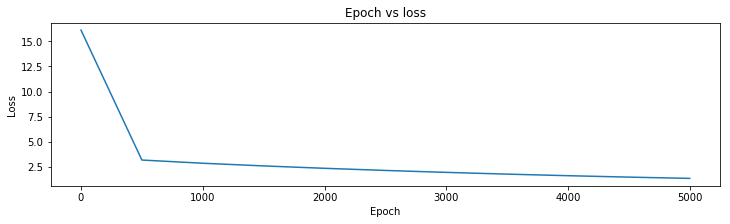

In [140]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,3))
plt.plot(step_list, loss_list, '-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs loss')
plt.show()

Para la red neuronal se usan 4 neuronas para el input, con 2 capas ocultas con 32 y 16 neuronas para la primera y segunda respectivamente, ambas con activación relu. La capa del output tiene una activación softmax con 3 salidas. Para abordar el problema de backpropagation se usa una función de perdida de cross entropy.

Como se puede apreciar en el grafico más arriba la red neuronal al ser entrenada, disminuye el valor para la función de perdida, es decir, se entrena de buena forma. Se puede ver que en un principio se consigue una gran disminución para luego ser más pausada, las primeras veces que se entrenó bastó para darle una buena forma a la red y que está pueda predecir de buena forma casos futuros, pero se puede apreciar que hasta el último momento logró disminuir la loss function, es decir, se entrenó hasta el último ciclo como ya se dijo. Se debe tener cuidado con sobre entrenar la red, ya que se producirá overfitting y se perderá la capacidad para que la red pueda predecir de buena manera casos futuros.